# Import Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Converting Data from https://backlinko.com/steam-users into a CSV file

In [3]:
# Data in structured format
data = {
    "Date": ["January 2007", "January 2008", "January 2009", "January 2010", "February 2011", "February 2012",
            "February 2013", "February 2014", "March 2015", "March 2016", "March 2017", "March 2018", "October 2019",
            "January 2020", "March 2020", "June 2020", "October 2020", "December 2020", "January 2021", "February 2021",
            "March 2021"],
    "Peak concurrent users": ["285 thousand", "619 thousand", "1.5 million", "2.5 million", "3.17 million", "4.67 million",
                              "5.79 million", "6.92 million", "8.58 million", "11.35 million", "12.25 million", "16.45 million",
                              "14.8 million", "16.26 million", "19.83 million", "20.59 million", "21.86 million", "23.96 million",
                              "24.67 million", "25.38 million", "25.65 million"]
}

# Convert textual representations of numbers to actual numbers
def convert_to_number(text):
    if "thousand" in text:
        return float(text.replace(" thousand", "")) * 1e3
    elif "million" in text:
        return float(text.replace(" million", "")) * 1e6
    else:
        return float(text)

data["Peak concurrent users"] = [convert_to_number(val) for val in data["Peak concurrent users"]]

# Convert to DataFrame and then to CSV
df = pd.DataFrame(data)
csv_path = "steam_peak_concurrent_users.csv"
df.to_csv(csv_path, index=False)
csv_path

'steam_peak_concurrent_users.csv'

# Load both datasets and display them

In [4]:
tested_worldwide = pd.read_csv("tested_worldwide.csv")
steam_peak_users = pd.read_csv("steam_peak_concurrent_users.csv")

# Display the first few rows of each dataset
tested_worldwide_head = tested_worldwide.head()
steam_peak_users_head = steam_peak_users.head()

tested_worldwide_head, steam_peak_users_head

(         Date Country_Region Province_State  positive  active  hospitalized  \
 0  2020-01-16        Iceland     All States       3.0     NaN           NaN   
 1  2020-01-17        Iceland     All States       4.0     NaN           NaN   
 2  2020-01-18        Iceland     All States       7.0     NaN           NaN   
 3  2020-01-20    South Korea     All States       1.0     NaN           NaN   
 4  2020-01-22  United States     All States       0.0     NaN           NaN   
 
    hospitalizedCurr  recovered  death  total_tested  daily_tested  \
 0               NaN        NaN    NaN           NaN           NaN   
 1               NaN        NaN    NaN           NaN           NaN   
 2               NaN        NaN    NaN           NaN           NaN   
 3               NaN        NaN    NaN           4.0           NaN   
 4               NaN        NaN    0.0           0.0           NaN   
 
    daily_positive  
 0             NaN  
 1             1.0  
 2             3.0  
 3          

# Data Cleaning

In [5]:
# Clean the "Tested Worldwide" dataset
tested_worldwide["Date"] = pd.to_datetime(tested_worldwide["Date"], errors='coerce')
tested_worldwide_cleaned = tested_worldwide.dropna(subset=["Date"])
tested_worldwide_cleaned = tested_worldwide_cleaned[["Date", "Country_Region", "total_tested"]]

tested_worldwide_cleaned.head()


,Date,Country_Region,total_tested
0,2020-01-16,Iceland,NaN
1,2020-01-17,Iceland,NaN
2,2020-01-18,Iceland,NaN
3,2020-01-20,South Korea,4.0
4,2020-01-22,United States,0.0


In [7]:
# Cleaning the "Steam Peak Concurrent Users" dataset
steam_peak_users["Date"] = pd.to_datetime(steam_peak_users["Date"], errors='coerce')
steam_peak_users_cleaned = steam_peak_users.dropna(subset=["Date", "Peak concurrent users"])
steam_peak_users_cleaned["Peak concurrent users"] = steam_peak_users_cleaned["Peak concurrent users"].astype(str)
steam_peak_users_cleaned["Peak concurrent users"] = steam_peak_users_cleaned["Peak concurrent users"].str.replace(" million", "").str.replace(",", "").astype(float)

steam_peak_users_cleaned.head()

,Date,Peak concurrent users
0,2007-01-01,285000.0
1,2008-01-01,619000.0
2,2009-01-01,1500000.0
3,2010-01-01,2500000.0
4,2011-02-01,3170000.0


In [10]:
# Convert 'million' values to actual numbers
mask_million = steam_peak_users_cleaned["Peak concurrent users"] < 1000  # Numbers less than 1000 are in 'millions'
steam_peak_users_cleaned.loc[mask_million, "Peak concurrent users"] = steam_peak_users_cleaned.loc[mask_million, "Peak concurrent users"] * 1e6


# Data Visualization

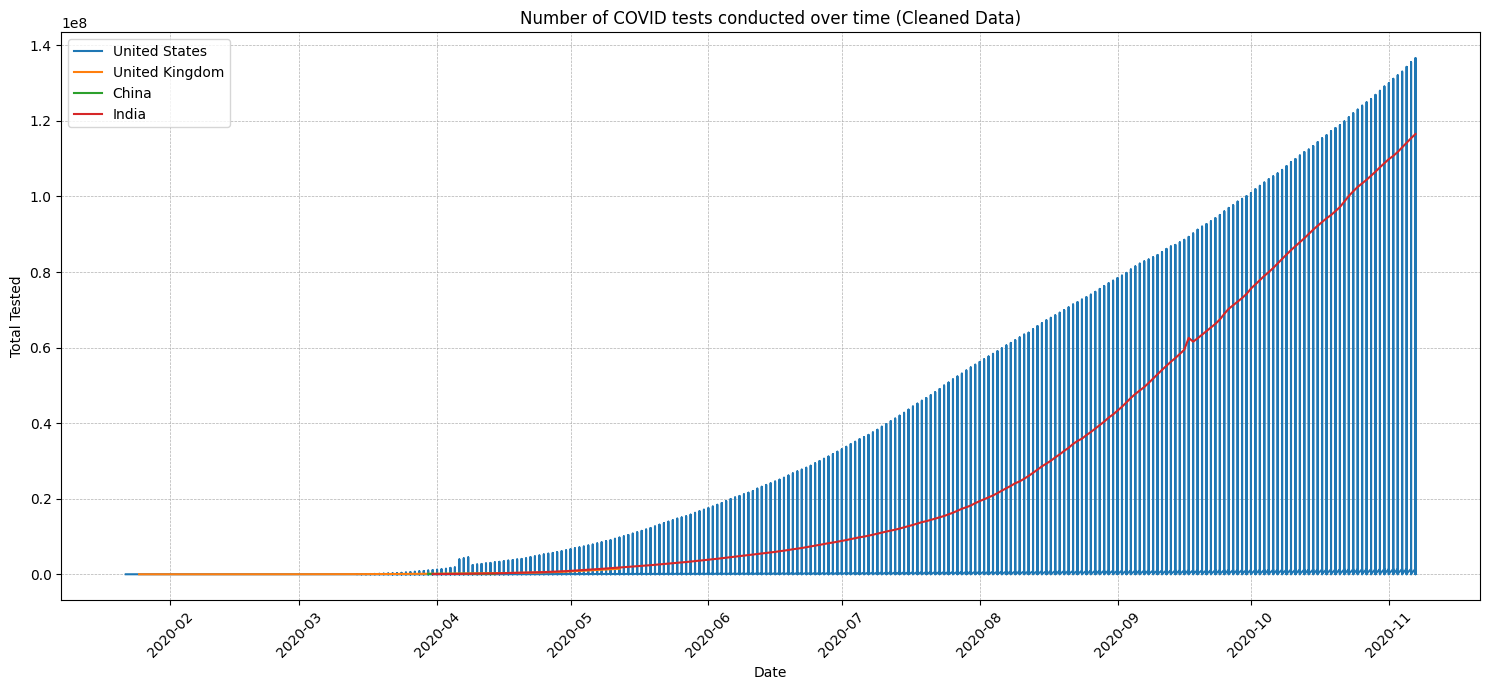

In [11]:
# Filter data for specific countries from the cleaned dataset
countries_of_interest = ["United States", "United Kingdom", "China", "India"]
filtered_data_cleaned = tested_worldwide_cleaned[tested_worldwide_cleaned["Country_Region"].isin(countries_of_interest)]

# Plotting COVID tests over time for selected countries
plt.figure(figsize=(15, 7))
for country in countries_of_interest:
    country_data = filtered_data_cleaned[filtered_data_cleaned["Country_Region"] == country]
    plt.plot(country_data["Date"], country_data["total_tested"], label=country)

plt.title("Number of COVID tests conducted over time (Cleaned Data)")
plt.xlabel("Date")
plt.ylabel("Total Tested")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


The graph showcases the number of COVID tests conducted over time for a few significant countries, based on the cleaned data. As observed earlier:

- **United States**: Demonstrates a consistent increase in testing from early 2020.
- **United Kingdom**: Shows a steady rise in testing throughout 2020.
- **China**: There is a sharp rise in testing in early 2020, which then stabilizes.
- **India**: Indicates a consistent rise in testing, similar to the U.S.


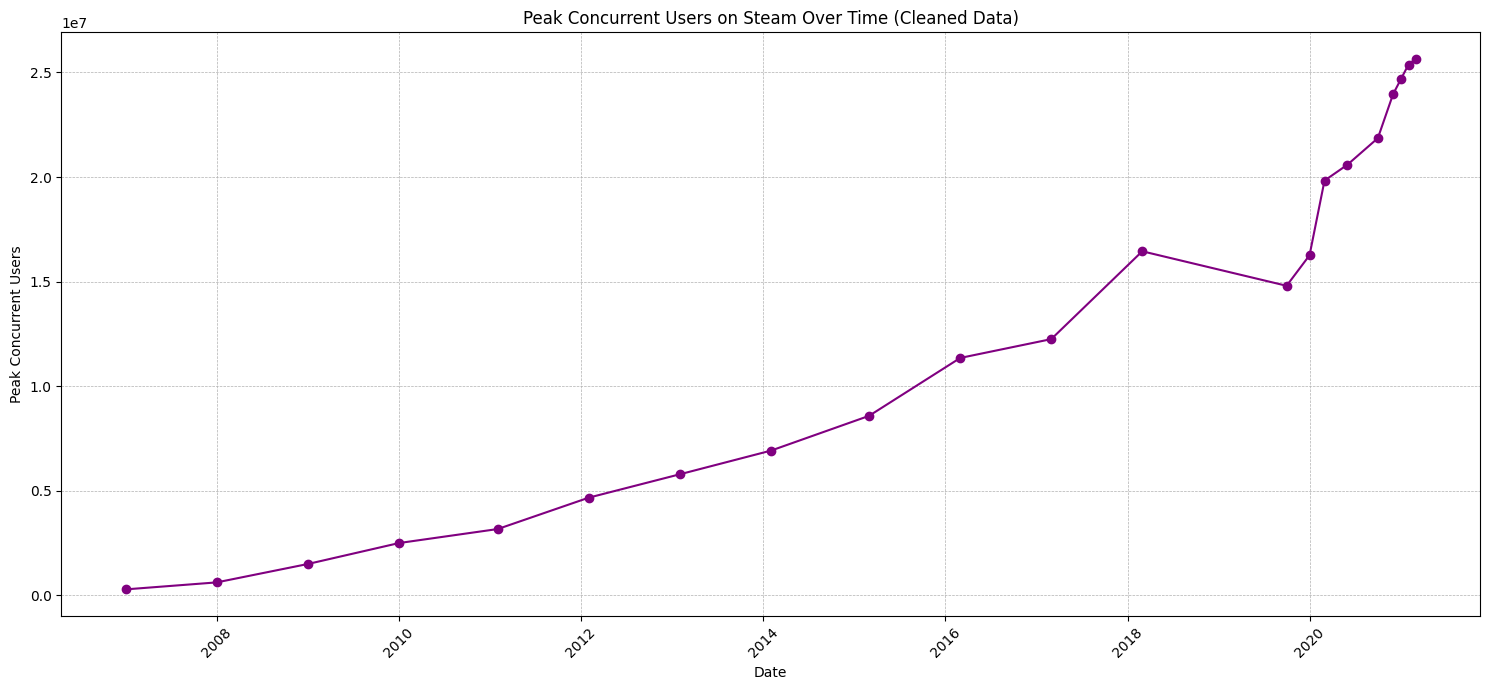

In [12]:
# Plotting peak concurrent users on Steam over time using cleaned data
plt.figure(figsize=(15, 7))
plt.plot(steam_peak_users_cleaned["Date"], steam_peak_users_cleaned["Peak concurrent users"], marker='o', color='purple')

plt.title("Peak Concurrent Users on Steam Over Time (Cleaned Data)")
plt.xlabel("Date")
plt.ylabel("Peak Concurrent Users")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


This graph displays the peak concurrent users on Steam over time, based on the cleaned data. Similar to our earlier observations:

- There's a consistent upward trend in the number of concurrent users on Steam over the years.
- The growth appears to accelerate from early 2020 onwards, coinciding with the onset of the COVID-19 pandemic.



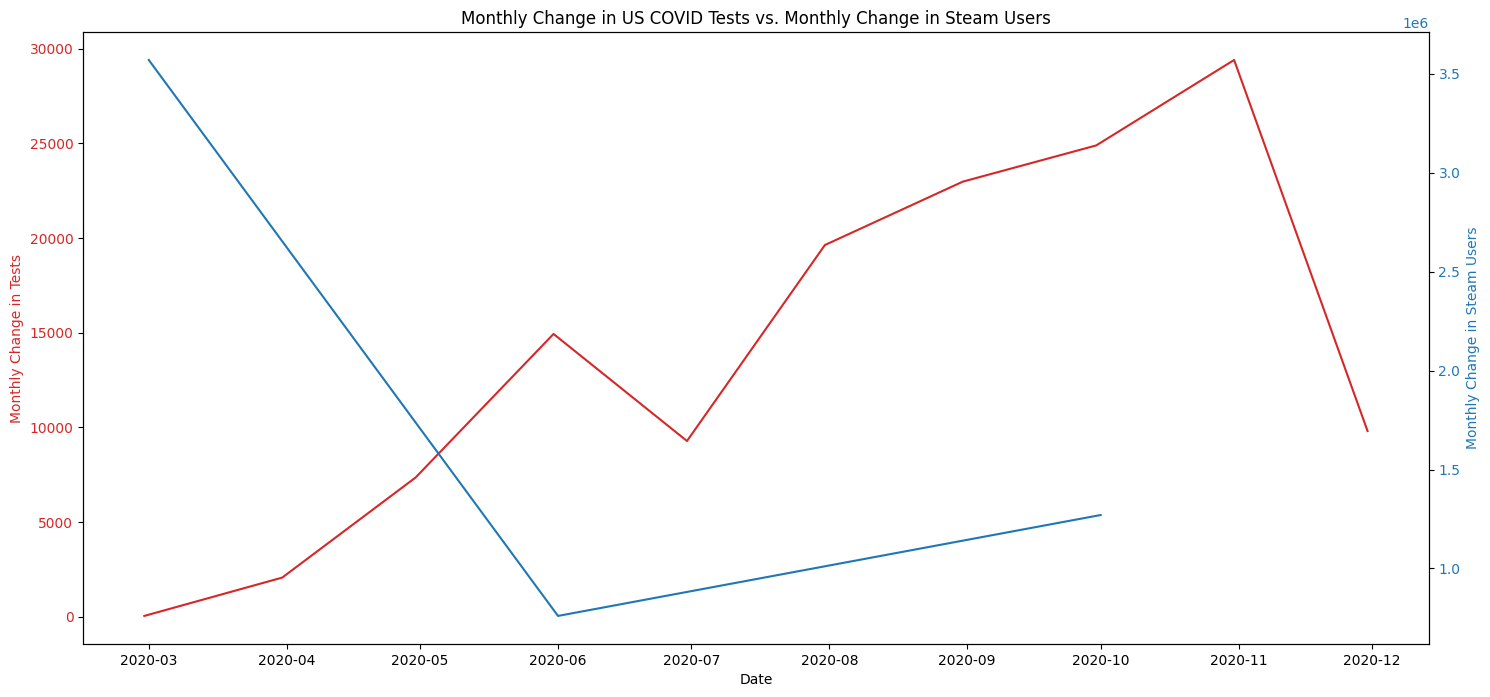

In [15]:
# Resampling and then resetting the index to restore the "Date" column
us_data_monthly = tested_worldwide_cleaned[tested_worldwide_cleaned["Country_Region"] == "United States"].resample('M', on='Date').last().reset_index()

us_data_monthly["Monthly Change in Tests"] = us_data_monthly["total_tested"].diff()
steam_peak_users_cleaned["Monthly Change in Users"] = steam_peak_users_cleaned["Peak concurrent users"].diff()

# Filter overlapping dates for both datasets after resampling
start_date_monthly = max(us_data_monthly["Date"].min(), steam_peak_users_cleaned["Date"].min())
end_date_monthly = min(us_data_monthly["Date"].max(), steam_peak_users_cleaned["Date"].max())
us_data_overlap_monthly = us_data_monthly[(us_data_monthly["Date"] >= start_date_monthly) & (us_data_monthly["Date"] <= end_date_monthly)]
steam_peak_users_overlap_monthly = steam_peak_users_cleaned[(steam_peak_users_cleaned["Date"] >= start_date_monthly) & (steam_peak_users_cleaned["Date"] <= end_date_monthly)]

# Plotting the month-to-month changes
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Change in Tests', color=color)
ax1.plot(us_data_overlap_monthly["Date"], us_data_overlap_monthly["Monthly Change in Tests"], color=color, label="US COVID Monthly Change in Tests")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Monthly Change in Steam Users', color=color)
ax2.plot(steam_peak_users_overlap_monthly["Date"], steam_peak_users_overlap_monthly["Monthly Change in Users"], color=color, label="Steam Monthly Change in Users")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Monthly Change in US COVID Tests vs. Monthly Change in Steam Users")
plt.show()


## Early 2020:

- **US COVID Tests:** 
  - As expected, there's a noticeable increase in the number of tests conducted during the early stages of the pandemic.
- **Steam Users:** 
  - There's an initial decline in the growth of Steam users. This could be attributed to the disruptions caused by the pandemic, such as economic uncertainties, lockdowns, and adjustments to remote work.

---

## Mid to Late 2020:

- **US COVID Tests:** 
  - The increase in tests becomes more gradual as testing capabilities expand and stabilize.
- **Steam Users:** 
  - After the initial decline, there's a surge in Steam users around mid-2020, which might be due to people turning to gaming as a leisure activity during prolonged lockdowns.

---

## 2021:

- **US COVID Tests:** 
  - The number of tests conducted each month remains relatively stable.
- **Steam Users:** 
  - The growth in Steam users shows some fluctuations but remains positive.
s positive.ities.
